<a href="https://colab.research.google.com/github/ydvshalu001/color-detection-/blob/main/color_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python matplotlib scikit-learn

In [2]:
from google.colab import files
uploaded = files.upload()

Saving IMG_20240827_224531_670.jpg to IMG_20240827_224531_670.jpg


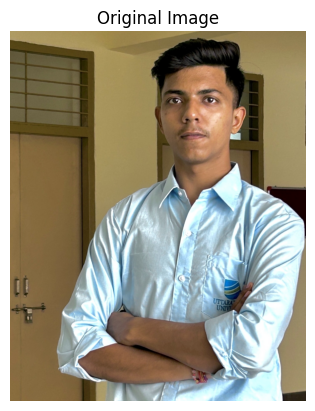

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Use the uploaded filename
filename = list(uploaded.keys())[0]

# Load image
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(img)
plt.axis('off')
plt.title("Original Image")
plt.show()

In [4]:
from sklearn.cluster import KMeans

# Resize image for faster computation
img_small = cv2.resize(img, (100, 100))

# Reshape image to a 2D array of pixels
pixels = img_small.reshape((-1, 3))

# KMeans with 5 colors
kmeans = KMeans(n_clusters=5)
kmeans.fit(pixels)

# Get dominant colors
colors = kmeans.cluster_centers_.astype(int)
labels = kmeans.labels_

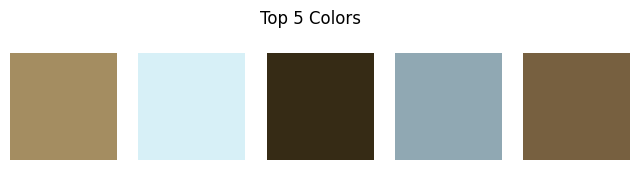

In [5]:
def plot_colors(colors):
    plt.figure(figsize=(8, 2))
    for i, color in enumerate(colors):
        plt.subplot(1, 5, i+1)
        plt.imshow([[color / 255]])
        plt.axis('off')
    plt.suptitle("Top 5 Colors")
    plt.show()

plot_colors(colors)